<a href="https://colab.research.google.com/github/Raneem04H/-Wearer-Verification-and-Identity-Attribution-Using-Smartwatch-Data/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/file/Final_Dataset2.xlsx"

df = pd.read_excel(file_path)

print("Shape:", df.shape)
df.head()

Shape: (310, 40)


,TimeStamp,DB_Case,Gender,AgeGroup,EmploymentStatus,MaritalStatus,MaxRate,MinRate,AverageRestRate,SDNN,...,SnoreFreq,WakeUpTime,Q_Physical,Q_Verbal,Q_Anger,Q_Hostility,FQ_Physical,FQ_Verbal,FQ_Anger,FQ_Hostility
0,20230928,1,2,3,1,2,101,41,58,29.093687,...,1.5,247.0,0.277778,0.25,0.25,0.1875,0.111111,0.45,0.214286,0.34375
1,20230929,1,2,3,1,2,158,53,62,43.864247,...,0.0,402.0,0.277778,0.25,0.25,0.1875,0.111111,0.45,0.214286,0.34375
2,20230930,1,2,3,1,2,168,40,71,48.443938,...,0.0,238.0,0.277778,0.25,0.25,0.1875,0.111111,0.45,0.214286,0.34375
3,20231001,1,2,3,1,2,158,45,76,46.019558,...,3.0,210.0,0.277778,0.25,0.25,0.1875,0.111111,0.45,0.214286,0.34375
4,20231002,1,2,3,1,2,148,46,60,37.156536,...,0.0,210.0,0.277778,0.25,0.25,0.1875,0.111111,0.45,0.214286,0.34375


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
if 'TimeStamp' in df.columns:
    df = df.drop(columns=['TimeStamp',"AgeGroup","Gender","MaritalStatus","EmploymentStatus"]) # drop TimeStamp since it's not biometric

# check missing values
print("Missing values in each column:")
print(df.isna().sum())
df = df.fillna(df.mean(numeric_only=True))

Missing values in each column:
DB_Case             0
MaxRate             0
MinRate             0
AverageRestRate     0
SDNN                0
SDRR                0
MaxStress           0
MinStress           0
AverageStress       0
MaxBloodOxygen      0
MinBloodOxygen      0
avgSaturation       0
lastSaturation      0
AllSleepTime        0
AwakeSleepTime      0
AwakeTimes          0
DeepSleepPart       0
DeepSleepTime       0
FallAsleepTime      0
LightSleepTime      0
NappingIndicator    0
SleepDreamTime      0
SleepEfficiency     0
SleepNapTime        0
SleepScore          0
SnoreFreq           0
WakeUpTime          0
Q_Physical          0
Q_Verbal            0
Q_Anger             0
Q_Hostility         0
FQ_Physical         0
FQ_Verbal           0
FQ_Anger            0
FQ_Hostility        0
dtype: int64


In [ ]:
y = df['DB_Case']  # Goal
X = df.drop(columns=['DB_Case'])

In [ ]:
# convert the goal to numbers عشان ينفهم اكثر

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

num_classes = len(np.unique(y_enc))
num_classes

39

In [ ]:
# split data to training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

In [ ]:
# scalling ( important in model )
from sklearn.preprocessing import StandardScaler
import joblib  # to save scale

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# calculate class weight
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = {c: w for c, w in zip(classes, class_weights)}

class_weight_dict

{np.int64(0): np.float64(1.0598290598290598),
 np.int64(1): np.float64(1.0598290598290598),
 np.int64(2): np.float64(1.0598290598290598),
 np.int64(3): np.float64(1.0598290598290598),
 np.int64(4): np.float64(0.9084249084249084),
 np.int64(5): np.float64(1.0598290598290598),
 np.int64(6): np.float64(0.9084249084249084),
 np.int64(7): np.float64(1.0598290598290598),
 np.int64(8): np.float64(0.9084249084249084),
 np.int64(9): np.float64(1.0598290598290598),
 np.int64(10): np.float64(1.0598290598290598),
 np.int64(11): np.float64(1.0598290598290598),
 np.int64(12): np.float64(0.9084249084249084),
 np.int64(13): np.float64(0.9084249084249084),
 np.int64(14): np.float64(1.0598290598290598),
 np.int64(15): np.float64(0.9084249084249084),
 np.int64(16): np.float64(0.9084249084249084),
 np.int64(17): np.float64(0.9084249084249084),
 np.int64(18): np.float64(1.0598290598290598),
 np.int64(19): np.float64(1.0598290598290598),
 np.int64(20): np.float64(1.0598290598290598),
 np.int64(21): np.float

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout ,BatchNormalization

def build_model(input_dim,num_classes,dropout_rate=0.2):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(32, activation='relu'),
        Dropout(dropout_rate),

        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = build_model(input_dim=X_train_scaled.shape[1], num_classes=num_classes,dropout_rate=0.25)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 39)             │         1,287 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,871 (65.90 KB)

 Trainable params: 16,487 (64.40 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
mc = ModelCheckpoint('best_biometric_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6, verbose=1)

In [ ]:
# start training
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.15,
    epochs=200,
    batch_size=16,
    class_weight=class_weight_dict,
    callbacks=[es, mc, rlr],
    verbose=2
)

Epoch 1/200

Epoch 1: val_loss improved from inf to 3.69106, saving model to best_biometric_model.h5


14/14 - 3s - 242ms/step - accuracy: 0.0095 - loss: 4.1710 - val_accuracy: 0.0000e+00 - val_loss: 3.6911 - learning_rate: 1.0000e-03
Epoch 2/200

Epoch 2: val_loss improved from 3.69106 to 3.65213, saving model to best_biometric_model.h5


14/14 - 0s - 18ms/step - accuracy: 0.0333 - loss: 3.8230 - val_accuracy: 0.0263 - val_loss: 3.6521 - learning_rate: 1.0000e-03
Epoch 3/200

Epoch 3: val_loss improved from 3.65213 to 3.61177, saving model to best_biometric_model.h5


14/14 - 0s - 21ms/step - accuracy: 0.0571 - loss: 3.5909 - val_accuracy: 0.0789 - val_loss: 3.6118 - learning_rate: 1.0000e-03
Epoch 4/200

Epoch 4: val_loss improved from 3.61177 to 3.58238, saving model to best_biometric_model.h5


14/14 - 0s - 19ms/step - accuracy: 0.0667 - loss: 3.5236 - val_accuracy: 0.1316 - val_loss: 3.5824 - learning_rate: 1.0000e-03
Epoch 5/200

Epoch 5: val_loss improved from 3.58238 to 3.54491, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.1524 - loss: 3.2417 - val_accuracy: 0.1842 - val_loss: 3.5449 - learning_rate: 1.0000e-03
Epoch 6/200

Epoch 6: val_loss improved from 3.54491 to 3.50518, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.1286 - loss: 3.2509 - val_accuracy: 0.1842 - val_loss: 3.5052 - learning_rate: 1.0000e-03
Epoch 7/200

Epoch 7: val_loss improved from 3.50518 to 3.46122, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.1857 - loss: 3.0211 - val_accuracy: 0.1842 - val_loss: 3.4612 - learning_rate: 1.0000e-03
Epoch 8/200

Epoch 8: val_loss improved from 3.46122 to 3.40490, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.1810 - loss: 3.0531 - val_accuracy: 0.1842 - val_loss: 3.4049 - learning_rate: 1.0000e-03
Epoch 9/200

Epoch 9: val_loss improved from 3.40490 to 3.37093, saving model to best_biometric_model.h5


14/14 - 0s - 13ms/step - accuracy: 0.2714 - loss: 2.7822 - val_accuracy: 0.1842 - val_loss: 3.3709 - learning_rate: 1.0000e-03
Epoch 10/200

Epoch 10: val_loss improved from 3.37093 to 3.31774, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.2905 - loss: 2.7180 - val_accuracy: 0.1842 - val_loss: 3.3177 - learning_rate: 1.0000e-03
Epoch 11/200

Epoch 11: val_loss improved from 3.31774 to 3.27790, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.2571 - loss: 2.7735 - val_accuracy: 0.1842 - val_loss: 3.2779 - learning_rate: 1.0000e-03
Epoch 12/200

Epoch 12: val_loss improved from 3.27790 to 3.22215, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.2857 - loss: 2.6643 - val_accuracy: 0.1842 - val_loss: 3.2222 - learning_rate: 1.0000e-03
Epoch 13/200

Epoch 13: val_loss improved from 3.22215 to 3.16970, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.3524 - loss: 2.5398 - val_accuracy: 0.2105 - val_loss: 3.1697 - learning_rate: 1.0000e-03
Epoch 14/200

Epoch 14: val_loss improved from 3.16970 to 3.10766, saving model to best_biometric_model.h5


14/14 - 0s - 13ms/step - accuracy: 0.3000 - loss: 2.4467 - val_accuracy: 0.2105 - val_loss: 3.1077 - learning_rate: 1.0000e-03
Epoch 15/200

Epoch 15: val_loss improved from 3.10766 to 3.04200, saving model to best_biometric_model.h5


14/14 - 0s - 13ms/step - accuracy: 0.3714 - loss: 2.3826 - val_accuracy: 0.2368 - val_loss: 3.0420 - learning_rate: 1.0000e-03
Epoch 16/200

Epoch 16: val_loss improved from 3.04200 to 2.96821, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.3857 - loss: 2.3599 - val_accuracy: 0.2368 - val_loss: 2.9682 - learning_rate: 1.0000e-03
Epoch 17/200

Epoch 17: val_loss improved from 2.96821 to 2.89242, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.4000 - loss: 2.2671 - val_accuracy: 0.3158 - val_loss: 2.8924 - learning_rate: 1.0000e-03
Epoch 18/200

Epoch 18: val_loss improved from 2.89242 to 2.82077, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.4667 - loss: 2.0993 - val_accuracy: 0.3421 - val_loss: 2.8208 - learning_rate: 1.0000e-03
Epoch 19/200

Epoch 19: val_loss improved from 2.82077 to 2.78155, saving model to best_biometric_model.h5


14/14 - 0s - 13ms/step - accuracy: 0.4905 - loss: 2.0663 - val_accuracy: 0.3158 - val_loss: 2.7815 - learning_rate: 1.0000e-03
Epoch 20/200

Epoch 20: val_loss improved from 2.78155 to 2.71748, saving model to best_biometric_model.h5


14/14 - 0s - 13ms/step - accuracy: 0.4762 - loss: 2.0276 - val_accuracy: 0.3158 - val_loss: 2.7175 - learning_rate: 1.0000e-03
Epoch 21/200

Epoch 21: val_loss improved from 2.71748 to 2.65080, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.4952 - loss: 1.9397 - val_accuracy: 0.3947 - val_loss: 2.6508 - learning_rate: 1.0000e-03
Epoch 22/200

Epoch 22: val_loss improved from 2.65080 to 2.56805, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.5286 - loss: 1.8900 - val_accuracy: 0.3421 - val_loss: 2.5681 - learning_rate: 1.0000e-03
Epoch 23/200

Epoch 23: val_loss improved from 2.56805 to 2.51269, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.4810 - loss: 1.8896 - val_accuracy: 0.3684 - val_loss: 2.5127 - learning_rate: 1.0000e-03
Epoch 24/200

Epoch 24: val_loss improved from 2.51269 to 2.42177, saving model to best_biometric_model.h5


14/14 - 0s - 13ms/step - accuracy: 0.5381 - loss: 1.7336 - val_accuracy: 0.3684 - val_loss: 2.4218 - learning_rate: 1.0000e-03
Epoch 25/200

Epoch 25: val_loss improved from 2.42177 to 2.35511, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.5333 - loss: 1.7114 - val_accuracy: 0.3947 - val_loss: 2.3551 - learning_rate: 1.0000e-03
Epoch 26/200

Epoch 26: val_loss improved from 2.35511 to 2.29962, saving model to best_biometric_model.h5


14/14 - 0s - 14ms/step - accuracy: 0.5333 - loss: 1.7045 - val_accuracy: 0.3947 - val_loss: 2.2996 - learning_rate: 1.0000e-03
Epoch 27/200

Epoch 27: val_loss improved from 2.29962 to 2.25608, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.5143 - loss: 1.7392 - val_accuracy: 0.3947 - val_loss: 2.2561 - learning_rate: 1.0000e-03
Epoch 28/200

Epoch 28: val_loss improved from 2.25608 to 2.19976, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.6000 - loss: 1.5811 - val_accuracy: 0.3947 - val_loss: 2.1998 - learning_rate: 1.0000e-03
Epoch 29/200

Epoch 29: val_loss improved from 2.19976 to 2.11844, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.5952 - loss: 1.5184 - val_accuracy: 0.3947 - val_loss: 2.1184 - learning_rate: 1.0000e-03
Epoch 30/200

Epoch 30: val_loss improved from 2.11844 to 2.06573, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.5762 - loss: 1.5616 - val_accuracy: 0.5000 - val_loss: 2.0657 - learning_rate: 1.0000e-03
Epoch 31/200

Epoch 31: val_loss improved from 2.06573 to 2.02518, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.6000 - loss: 1.5431 - val_accuracy: 0.5000 - val_loss: 2.0252 - learning_rate: 1.0000e-03
Epoch 32/200

Epoch 32: val_loss improved from 2.02518 to 1.98388, saving model to best_biometric_model.h5


14/14 - 0s - 13ms/step - accuracy: 0.5952 - loss: 1.5094 - val_accuracy: 0.5263 - val_loss: 1.9839 - learning_rate: 1.0000e-03
Epoch 33/200

Epoch 33: val_loss improved from 1.98388 to 1.96084, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.6571 - loss: 1.4126 - val_accuracy: 0.5263 - val_loss: 1.9608 - learning_rate: 1.0000e-03
Epoch 34/200

Epoch 34: val_loss improved from 1.96084 to 1.92087, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.6333 - loss: 1.3357 - val_accuracy: 0.5000 - val_loss: 1.9209 - learning_rate: 1.0000e-03
Epoch 35/200

Epoch 35: val_loss improved from 1.92087 to 1.86606, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.6857 - loss: 1.2444 - val_accuracy: 0.5263 - val_loss: 1.8661 - learning_rate: 1.0000e-03
Epoch 36/200

Epoch 36: val_loss improved from 1.86606 to 1.81518, saving model to best_biometric_model.h5


14/14 - 0s - 22ms/step - accuracy: 0.6571 - loss: 1.2726 - val_accuracy: 0.5263 - val_loss: 1.8152 - learning_rate: 1.0000e-03
Epoch 37/200

Epoch 37: val_loss improved from 1.81518 to 1.76137, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.6810 - loss: 1.3102 - val_accuracy: 0.5526 - val_loss: 1.7614 - learning_rate: 1.0000e-03
Epoch 38/200

Epoch 38: val_loss improved from 1.76137 to 1.68071, saving model to best_biometric_model.h5


14/14 - 0s - 13ms/step - accuracy: 0.6429 - loss: 1.2560 - val_accuracy: 0.5789 - val_loss: 1.6807 - learning_rate: 1.0000e-03
Epoch 39/200

Epoch 39: val_loss improved from 1.68071 to 1.64698, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.6762 - loss: 1.2125 - val_accuracy: 0.5526 - val_loss: 1.6470 - learning_rate: 1.0000e-03
Epoch 40/200

Epoch 40: val_loss improved from 1.64698 to 1.64614, saving model to best_biometric_model.h5


14/14 - 0s - 13ms/step - accuracy: 0.6810 - loss: 1.1946 - val_accuracy: 0.5263 - val_loss: 1.6461 - learning_rate: 1.0000e-03
Epoch 41/200

Epoch 41: val_loss improved from 1.64614 to 1.63126, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.7000 - loss: 1.0929 - val_accuracy: 0.5526 - val_loss: 1.6313 - learning_rate: 1.0000e-03
Epoch 42/200

Epoch 42: val_loss improved from 1.63126 to 1.59301, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.7000 - loss: 1.2002 - val_accuracy: 0.6053 - val_loss: 1.5930 - learning_rate: 1.0000e-03
Epoch 43/200

Epoch 43: val_loss improved from 1.59301 to 1.55704, saving model to best_biometric_model.h5


14/14 - 0s - 13ms/step - accuracy: 0.7524 - loss: 0.9747 - val_accuracy: 0.6053 - val_loss: 1.5570 - learning_rate: 1.0000e-03
Epoch 44/200

Epoch 44: val_loss improved from 1.55704 to 1.52849, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.6952 - loss: 1.0187 - val_accuracy: 0.6053 - val_loss: 1.5285 - learning_rate: 1.0000e-03
Epoch 45/200

Epoch 45: val_loss improved from 1.52849 to 1.46601, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.6905 - loss: 1.0262 - val_accuracy: 0.6579 - val_loss: 1.4660 - learning_rate: 1.0000e-03
Epoch 46/200

Epoch 46: val_loss improved from 1.46601 to 1.44124, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.7000 - loss: 0.9800 - val_accuracy: 0.6579 - val_loss: 1.4412 - learning_rate: 1.0000e-03
Epoch 47/200

Epoch 47: val_loss improved from 1.44124 to 1.39833, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.6619 - loss: 1.1094 - val_accuracy: 0.6579 - val_loss: 1.3983 - learning_rate: 1.0000e-03
Epoch 48/200

Epoch 48: val_loss improved from 1.39833 to 1.34743, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.6905 - loss: 1.0491 - val_accuracy: 0.6579 - val_loss: 1.3474 - learning_rate: 1.0000e-03
Epoch 49/200

Epoch 49: val_loss did not improve from 1.34743
14/14 - 0s - 10ms/step - accuracy: 0.7333 - loss: 0.9576 - val_accuracy: 0.6316 - val_loss: 1.3570 - learning_rate: 1.0000e-03
Epoch 50/200

Epoch 50: val_loss did not improve from 1.34743
14/14 - 0s - 10ms/step - accuracy: 0.7524 - loss: 1.0389 - val_accuracy: 0.6316 - val_loss: 1.3491 - learning_rate: 1.0000e-03
Epoch 51/200

Epoch 51: val_loss improved from 1.34743 to 1.33536, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.7286 - loss: 0.9459 - val_accuracy: 0.6316 - val_loss: 1.3354 - learning_rate: 1.0000e-03
Epoch 52/200

Epoch 52: val_loss improved from 1.33536 to 1.30051, saving model to best_biometric_model.h5


14/14 - 0s - 13ms/step - accuracy: 0.7286 - loss: 1.0239 - val_accuracy: 0.6579 - val_loss: 1.3005 - learning_rate: 1.0000e-03
Epoch 53/200

Epoch 53: val_loss did not improve from 1.30051
14/14 - 0s - 9ms/step - accuracy: 0.7429 - loss: 0.9383 - val_accuracy: 0.6316 - val_loss: 1.3104 - learning_rate: 1.0000e-03
Epoch 54/200

Epoch 54: val_loss improved from 1.30051 to 1.24636, saving model to best_biometric_model.h5


14/14 - 0s - 13ms/step - accuracy: 0.7476 - loss: 0.9222 - val_accuracy: 0.6316 - val_loss: 1.2464 - learning_rate: 1.0000e-03
Epoch 55/200

Epoch 55: val_loss did not improve from 1.24636
14/14 - 0s - 9ms/step - accuracy: 0.7190 - loss: 0.9639 - val_accuracy: 0.6316 - val_loss: 1.2515 - learning_rate: 1.0000e-03
Epoch 56/200

Epoch 56: val_loss did not improve from 1.24636
14/14 - 0s - 11ms/step - accuracy: 0.7714 - loss: 0.7878 - val_accuracy: 0.6579 - val_loss: 1.2469 - learning_rate: 1.0000e-03
Epoch 57/200

Epoch 57: val_loss improved from 1.24636 to 1.23408, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.7619 - loss: 0.9061 - val_accuracy: 0.6579 - val_loss: 1.2341 - learning_rate: 1.0000e-03
Epoch 58/200

Epoch 58: val_loss improved from 1.23408 to 1.23236, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.7810 - loss: 0.7818 - val_accuracy: 0.6316 - val_loss: 1.2324 - learning_rate: 1.0000e-03
Epoch 59/200

Epoch 59: val_loss did not improve from 1.23236
14/14 - 0s - 9ms/step - accuracy: 0.7286 - loss: 0.9285 - val_accuracy: 0.6316 - val_loss: 1.2442 - learning_rate: 1.0000e-03
Epoch 60/200

Epoch 60: val_loss did not improve from 1.23236
14/14 - 0s - 10ms/step - accuracy: 0.7857 - loss: 0.7890 - val_accuracy: 0.6579 - val_loss: 1.2583 - learning_rate: 1.0000e-03
Epoch 61/200

Epoch 61: val_loss did not improve from 1.23236
14/14 - 0s - 9ms/step - accuracy: 0.7524 - loss: 0.7394 - val_accuracy: 0.6579 - val_loss: 1.2609 - learning_rate: 1.0000e-03
Epoch 62/200

Epoch 62: val_loss did not improve from 1.23236
14/14 - 0s - 14ms/step - accuracy: 0.7905 - loss: 0.6898 - val_accuracy: 0.6579 - val_loss: 1.2502 - learning_rate: 1.0000e-03
Epoch 63/200

Epoch 63: val_loss did not improve from 1.23236
14/14 - 0s - 15ms/step - accuracy: 0.8000 - loss: 0.7629 

14/14 - 0s - 25ms/step - accuracy: 0.7524 - loss: 0.8796 - val_accuracy: 0.6316 - val_loss: 1.2207 - learning_rate: 1.0000e-03
Epoch 66/200

Epoch 66: val_loss improved from 1.22073 to 1.19744, saving model to best_biometric_model.h5


14/14 - 0s - 17ms/step - accuracy: 0.7619 - loss: 0.7900 - val_accuracy: 0.6053 - val_loss: 1.1974 - learning_rate: 1.0000e-03
Epoch 67/200

Epoch 67: val_loss improved from 1.19744 to 1.16848, saving model to best_biometric_model.h5


14/14 - 0s - 23ms/step - accuracy: 0.7714 - loss: 0.7517 - val_accuracy: 0.6053 - val_loss: 1.1685 - learning_rate: 1.0000e-03
Epoch 68/200

Epoch 68: val_loss improved from 1.16848 to 1.12050, saving model to best_biometric_model.h5


14/14 - 0s - 17ms/step - accuracy: 0.7286 - loss: 0.7913 - val_accuracy: 0.6579 - val_loss: 1.1205 - learning_rate: 1.0000e-03
Epoch 69/200

Epoch 69: val_loss improved from 1.12050 to 1.11639, saving model to best_biometric_model.h5


14/14 - 0s - 19ms/step - accuracy: 0.8095 - loss: 0.6825 - val_accuracy: 0.6316 - val_loss: 1.1164 - learning_rate: 1.0000e-03
Epoch 70/200

Epoch 70: val_loss did not improve from 1.11639
14/14 - 0s - 13ms/step - accuracy: 0.8381 - loss: 0.6061 - val_accuracy: 0.6316 - val_loss: 1.1218 - learning_rate: 1.0000e-03
Epoch 71/200

Epoch 71: val_loss improved from 1.11639 to 1.10489, saving model to best_biometric_model.h5


14/14 - 0s - 19ms/step - accuracy: 0.7857 - loss: 0.7163 - val_accuracy: 0.6579 - val_loss: 1.1049 - learning_rate: 1.0000e-03
Epoch 72/200

Epoch 72: val_loss did not improve from 1.10489
14/14 - 0s - 14ms/step - accuracy: 0.7571 - loss: 0.7503 - val_accuracy: 0.6579 - val_loss: 1.1125 - learning_rate: 1.0000e-03
Epoch 73/200

Epoch 73: val_loss improved from 1.10489 to 1.08568, saving model to best_biometric_model.h5


14/14 - 0s - 27ms/step - accuracy: 0.7857 - loss: 0.7388 - val_accuracy: 0.6579 - val_loss: 1.0857 - learning_rate: 1.0000e-03
Epoch 74/200

Epoch 74: val_loss improved from 1.08568 to 1.05844, saving model to best_biometric_model.h5


14/14 - 0s - 24ms/step - accuracy: 0.7667 - loss: 0.7170 - val_accuracy: 0.6842 - val_loss: 1.0584 - learning_rate: 1.0000e-03
Epoch 75/200

Epoch 75: val_loss improved from 1.05844 to 1.05549, saving model to best_biometric_model.h5


14/14 - 0s - 14ms/step - accuracy: 0.8190 - loss: 0.6401 - val_accuracy: 0.7368 - val_loss: 1.0555 - learning_rate: 1.0000e-03
Epoch 76/200

Epoch 76: val_loss did not improve from 1.05549
14/14 - 0s - 10ms/step - accuracy: 0.8429 - loss: 0.6538 - val_accuracy: 0.7368 - val_loss: 1.0715 - learning_rate: 1.0000e-03
Epoch 77/200

Epoch 77: val_loss did not improve from 1.05549
14/14 - 0s - 14ms/step - accuracy: 0.8095 - loss: 0.6483 - val_accuracy: 0.7105 - val_loss: 1.0854 - learning_rate: 1.0000e-03
Epoch 78/200

Epoch 78: val_loss did not improve from 1.05549
14/14 - 0s - 9ms/step - accuracy: 0.8524 - loss: 0.5429 - val_accuracy: 0.7105 - val_loss: 1.0812 - learning_rate: 1.0000e-03
Epoch 79/200

Epoch 79: val_loss improved from 1.05549 to 1.03137, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.7857 - loss: 0.6975 - val_accuracy: 0.7368 - val_loss: 1.0314 - learning_rate: 1.0000e-03
Epoch 80/200

Epoch 80: val_loss did not improve from 1.03137
14/14 - 0s - 9ms/step - accuracy: 0.8381 - loss: 0.6279 - val_accuracy: 0.7105 - val_loss: 1.0512 - learning_rate: 1.0000e-03
Epoch 81/200

Epoch 81: val_loss did not improve from 1.03137
14/14 - 0s - 10ms/step - accuracy: 0.8524 - loss: 0.5752 - val_accuracy: 0.7105 - val_loss: 1.0723 - learning_rate: 1.0000e-03
Epoch 82/200

Epoch 82: val_loss did not improve from 1.03137
14/14 - 0s - 9ms/step - accuracy: 0.7619 - loss: 0.7304 - val_accuracy: 0.7105 - val_loss: 1.0708 - learning_rate: 1.0000e-03
Epoch 83/200

Epoch 83: val_loss improved from 1.03137 to 1.02560, saving model to best_biometric_model.h5


14/14 - 0s - 13ms/step - accuracy: 0.7952 - loss: 0.6343 - val_accuracy: 0.7632 - val_loss: 1.0256 - learning_rate: 1.0000e-03
Epoch 84/200

Epoch 84: val_loss improved from 1.02560 to 0.95656, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.8190 - loss: 0.6648 - val_accuracy: 0.7368 - val_loss: 0.9566 - learning_rate: 1.0000e-03
Epoch 85/200

Epoch 85: val_loss improved from 0.95656 to 0.91508, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.8000 - loss: 0.6401 - val_accuracy: 0.7632 - val_loss: 0.9151 - learning_rate: 1.0000e-03
Epoch 86/200

Epoch 86: val_loss improved from 0.91508 to 0.90741, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.8000 - loss: 0.5987 - val_accuracy: 0.7632 - val_loss: 0.9074 - learning_rate: 1.0000e-03
Epoch 87/200

Epoch 87: val_loss did not improve from 0.90741
14/14 - 0s - 19ms/step - accuracy: 0.8048 - loss: 0.6745 - val_accuracy: 0.7632 - val_loss: 0.9128 - learning_rate: 1.0000e-03
Epoch 88/200

Epoch 88: val_loss improved from 0.90741 to 0.89894, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.8286 - loss: 0.6037 - val_accuracy: 0.7368 - val_loss: 0.8989 - learning_rate: 1.0000e-03
Epoch 89/200

Epoch 89: val_loss improved from 0.89894 to 0.88649, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.8810 - loss: 0.4962 - val_accuracy: 0.7368 - val_loss: 0.8865 - learning_rate: 1.0000e-03
Epoch 90/200

Epoch 90: val_loss improved from 0.88649 to 0.85471, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.7762 - loss: 0.7054 - val_accuracy: 0.7368 - val_loss: 0.8547 - learning_rate: 1.0000e-03
Epoch 91/200

Epoch 91: val_loss improved from 0.85471 to 0.78200, saving model to best_biometric_model.h5


14/14 - 0s - 12ms/step - accuracy: 0.8143 - loss: 0.6111 - val_accuracy: 0.7632 - val_loss: 0.7820 - learning_rate: 1.0000e-03
Epoch 92/200

Epoch 92: val_loss did not improve from 0.78200
14/14 - 0s - 10ms/step - accuracy: 0.8190 - loss: 0.6426 - val_accuracy: 0.7632 - val_loss: 0.8187 - learning_rate: 1.0000e-03
Epoch 93/200

Epoch 93: val_loss did not improve from 0.78200
14/14 - 0s - 9ms/step - accuracy: 0.8238 - loss: 0.5910 - val_accuracy: 0.7368 - val_loss: 0.8795 - learning_rate: 1.0000e-03
Epoch 94/200

Epoch 94: val_loss did not improve from 0.78200
14/14 - 0s - 9ms/step - accuracy: 0.8286 - loss: 0.6036 - val_accuracy: 0.7105 - val_loss: 0.8830 - learning_rate: 1.0000e-03
Epoch 95/200

Epoch 95: val_loss did not improve from 0.78200
14/14 - 0s - 9ms/step - accuracy: 0.8333 - loss: 0.5591 - val_accuracy: 0.7105 - val_loss: 0.8774 - learning_rate: 1.0000e-03
Epoch 96/200

Epoch 96: val_loss did not improve from 0.78200
14/14 - 0s - 9ms/step - accuracy: 0.8524 - loss: 0.5448 - 

In [ ]:
# evaluate and print Accuracy
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}  |  Loss: {test_loss:.4f}")


Test Accuracy: 0.8871  |  Loss: 0.4462


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       0.67      1.00      0.80         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00

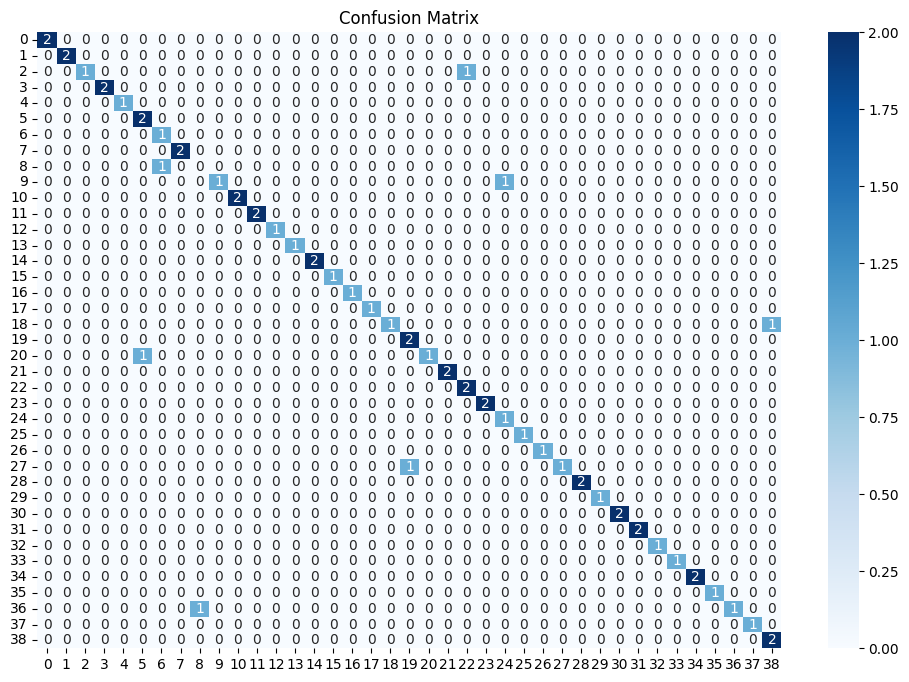

In [ ]:
# confusion matrix
y_pred = model.predict(X_test_scaled)
y_pred = y_pred.argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


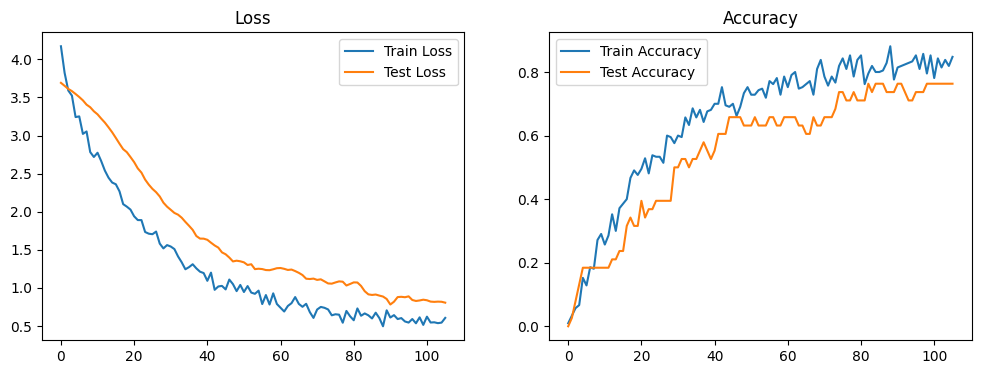

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend(); plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend(); plt.title('Accuracy')

plt.show()


In [ ]:
model.save('/content/drive/MyDrive/file/MyDrivemy_model.keras')